# Predict NFL Touchdowns

***

Here in this section I am going to attempt to make a model that will predict who will score nfl touchdowns next season.

In [1]:
# import required libaries
import pandas as pd
import glob
import os
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from ipywidgets import interact, interactive, fixed, Layout, Dropdown
from scipy import stats

In [2]:
# Read in multiple csv with same headings to 1 dataframe
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = '.\Data\Pred_data'
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\elyn\AppData\Local\Temp\ipykernel_22728\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,213,214,218,219,220,222,224,226,248,249,253,254,255,260,262,263,266,267,268,269,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\elyn\AppData\Local\Temp\ipykernel_22728\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
C:\Users\elyn\AppData\Local\Temp\ipykernel_22728\756877225.py:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify d

In [3]:
# reset the index as each csv will have its own
df = df.reset_index(drop=True)

In [5]:
# Take a peek
df.sample(20)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
145305,3528,2022_18_DET_GB,2023010804,GB,DET,REG,18,DET,away,GB,...,0,1,0.643084,0.203855,2.826722,1.0,1.000000,0.997863,0.188502,81.149840
43459,2831,2020_17_ARI_LA,2021010314,LA,ARI,REG,17,LA,home,ARI,...,0,0,2.752791,0.300140,3.702353,2.0,0.999036,0.999036,0.803195,19.680506
33975,3230,2020_13_NE_LAC,2020120611,LAC,NE,REG,13,LAC,home,NE,...,1,0,-3.444282,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130536,1415,2022_12_NYG_DAL,2022112401,DAL,NYG,REG,12,NYG,away,DAL,...,0,0,-0.545058,NaN,NaN,NaN,NaN,NaN,0.582583,-58.258343
16823,114,2020_07_CHI_LA,2020102600,LA,CHI,REG,7,CHI,away,LA,...,1,0,1.713515,0.237939,3.341551,1.0,0.996087,0.996087,0.975709,2.429116
54318,1975,2021_03_ARI_JAX,2021092603,JAX,ARI,REG,3,ARI,away,JAX,...,0,1,-7.651247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25344,705,2020_10_LAC_MIA,2020111512,MIA,LAC,REG,10,MIA,home,LAC,...,0,0,-0.094412,NaN,NaN,NaN,NaN,NaN,0.404488,-40.448833
119213,2193,2022_08_CIN_CLE,2022103100,CLE,CIN,REG,8,CLE,home,CIN,...,0,0,-0.391407,NaN,NaN,NaN,NaN,NaN,0.424231,-42.423135
57779,2948,2021_04_CLE_MIN,2021100305,MIN,CLE,REG,4,MIN,home,CLE,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142209,2859,2022_17_CHI_DET,2023010102,DET,CHI,REG,17,DET,home,CHI,...,1,0,-0.454814,1.633333,10.925351,10.0,0.312781,0.220886,0.921302,7.869774


In [6]:
# See the shape of the dataframe
print(df.shape)

(149373, 372)


# Grouping the data

***

As you can see this is a fairly large dataframe, in comparison to what I have been using up to now it is enormous. I will not be using all the data here to create my model so I will now begin cleaning and grouping the data I need. I will look through the column titles and find the colums with the data I want to analyses to see if there is a corrolation between that data and touchdown passess.

In [7]:
# list all columns in the dataframe 
df.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

### Choosing the Statistics to consider

***

Below I wil now group the attributes I consider to be releavent to the data I am trying to output from my model. First I will group the players and their stats by the position I am interested in, Quarterback. 

In [10]:
# Quarterback statistics to consider
qb_stats = [
    'season', 'passer_id', 'passer', 'pass', 
    'complete_pass', 'interception', 
    'sack', 'yards_gained', 'touchdown', 'qb_dropback', 'wind'
]

In [11]:
# Grouping criteria
groupby_stats = [
    'season', 'passer_id', 'passer'
]

In [14]:
# Group by and aggregate by sum
qb_df = df[qb_stats].groupby(groupby_stats, as_index=False).sum()

# Randomly sample 10 player-seasons
random_sample = qb_df.sample(n=10)

# Display the random sample
print(random_sample)

     season   passer_id     passer  pass  complete_pass  interception  sack  \
204    2021  00-0034857    J.Allen   831          457.0          15.0  28.0   
265    2022  00-0030565    G.Smith   737          424.0          12.0  49.0   
190    2021  00-0033908     C.Kupp     2            0.0           0.0   0.0   
143    2021  00-0029604  K.Cousins   635          372.0           7.0  28.0   
102    2020  00-0035652   R.Finley    43           17.0           2.0   9.0   
340    2022  00-0036893   N.Harris     1            1.0           0.0   0.0   
36     2020  00-0030520  M.Glennon   196          111.0           5.0   9.0   
83     2020  00-0034771  M.Rudolph    48           25.0           1.0   1.0   
133    2021  00-0027688    C.McCoy   114           74.0           1.0   6.0   
358    2022  00-0038128   M.Willis    84           31.0           3.0  10.0   

     yards_gained  touchdown  qb_dropback    wind  
204        5349.0       46.0        789.0     0.0  
265        4497.0       33

Aggregating statistics in the context of data analysis refers to the process of summarizing and condensing data values within groups.  
The selected subset of columns are grouped by the columns listed in groupby_stats. It groups the data into distinct groups based on unique combinations of values in the specified columns.  

First as an example, I will take a single attribute of that I am almost certain has a strong impact on if a touchdown is scored, that is **yards_gained**. 

### Analyse a single influence

***

In [15]:
# List of variables to analyze correlation with touchdowns
variables_to_analyze = ['yards_gained']
variable = 'yards_gained'


As evidence before I begin fitting the data I will genterate the correlation coefficent, or r-value. The correlation coefficient (r-value) measures the strength and direction of a linear relationship between two variables. The value of the correlation coefficient can range from -1 to 1:

 - If the correlation coefficient is close to 1, it indicates a strong positive linear relationship, meaning that as one variable increases, the other tends to increase as well.  
 - If the correlation coefficient is close to -1, it indicates a strong negative linear relationship, meaning that as one variable increases, the other tends to decrease.  
 - If the correlation coefficient is close to 0, it indicates a weak or no linear relationship between the variables.

In [21]:
# Calculate correlation coefficient
correlation_coefficient = qb_df['touchdown'].corr(qb_df[variable])

#Show result
correlation_coefficient

0.9686882136686202

The correlation coefficient of approximately 0.97 indicates a strong positive linear relationship between these two variables. This means that as the number of yards gained increases, the number of touchdowns tends to increase as well. 
Now I am going to use the linregress function in scipy,stats to calculate the parameters needed to define a linear regression line that best fits the data. 

In [22]:
# Fit a linear regression line
slope, intercept, r_value, p_value , std_err = stats.linregress(qb_df['touchdown'], qb_df[variable])
print('Slope = ', slope)
print('Intercept = ', intercept)
print('r_value = ', r_value)
print('p_value = ', p_value)
print('std_err = ',  std_err)

Slope =  125.4770725641528
Intercept =  130.44860595846012
r_value =  0.9686882136686199
p_value =  4.3000417337668435e-218
std_err =  1.7021140132676573


From this information I can now create the regression line. This line creates the equation of the linear regression line using the calculated slope and intercept. The equation is y = mx + b, where y is the predicted value (in this case, qb_df['ysrds_gained']), x is the input (qb_df['touchdown']), m is the slope, and b is the intercept.

Also it should be noted the p-value is a measure of the evidence against a null hypothesis (the hypothesis that there's no relationship between the variables). A very small p-value (4.3e-218 in this case) suggests strong evidence against the null hypothesis, indicating that the relationship between 'touchdown' and 'yards_gained' is statistically significant. Also standard error value of 1.702 is relatively small, which suggests that the estimated slope of the regression line is reliable. A smaller standard error indicates that the data points are relatively close to the regression line, meaning that the line provides a good fit to the data.

The slope of the regression line was calculated to be approximately 125.48. This value represents the estimated change in yards gained for every additional touchdown. It indicates that, on average, an increase of one touchdown is associated with an increase of around 125.48 yards gained.  

The intercept of the regression line was determined to be approximately 130.45. This value represents the estimated yards gained when there are no touchdowns. In other words, even without any touchdowns, quarterbacks are estimated to gain around 130.45 yards.  

By multiplying the slope with qb_df['touchdown'] and adding the intercept, I get the predicted y-values for each x-value. These predicted values form the points on the regression line, which can then be plotted to visualize how well the line fits the data.

In [23]:
# Get the regressuion line
regression_line = slope * qb_df['touchdown'] + intercept

#Show predicted y values for each X-value
regression_line

0      6655.256379
1      3518.329565
2       130.448606
3      4898.577363
4      3518.329565
          ...     
354    2263.558840
355    1134.265186
356     757.833969
357     381.402751
358     130.448606
Name: touchdown, Length: 359, dtype: float64

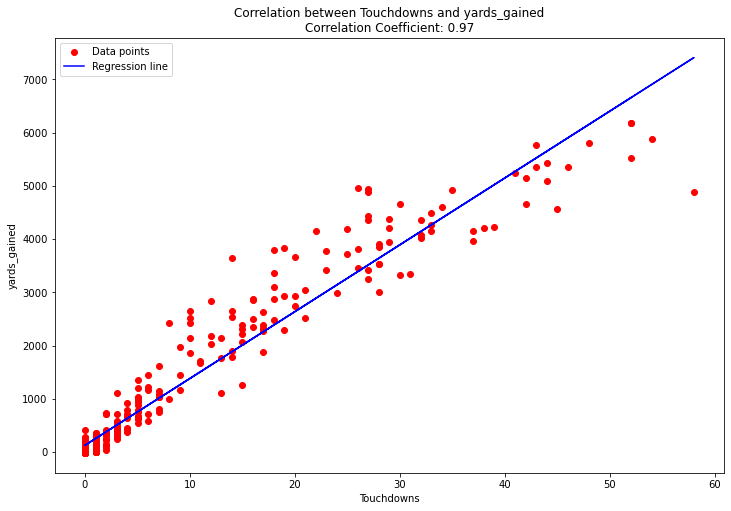

In [24]:
#Plot the data
plt.figure(figsize=(12, 8))  # Set figsize
# Create scatter plot
plt.scatter(qb_df['touchdown'], qb_df[variable], color='red', label='Data points')

#plot the regression line
plt.plot(qb_df['touchdown'], regression_line, color='blue', label='Regression line')

plt.title(f"Correlation between Touchdowns and {variable}\nCorrelation Coefficient: {correlation_coefficient:.2f}")
plt.xlabel('Touchdowns')
plt.ylabel(variable)
plt.legend()
plt.show()

The scatter plot displays the data points in red, with each point representing a quarterback's touchdowns and corresponding yards gained. The blue regression line is fitted to the data points using the calculated slope and intercept. This line serves as a predictive model for estimating yards gained based on the number of touchdowns.
The analysis and visualisation indicate a strong positive correlation between the number of touchdowns and the yards gained by quarterbacks. The regression analysis and visualization provide valuable insights into the relationship between these variables and offer a predictive model for estimating yards gained based on touchdown counts.

### Analyse multiable influences

***

Now I could go doing this, individually, for all the data that I believe has a strong relationship with scoring touchdown passes, however there is a plotting tool  called regplot() in the seaborn libary that will not only plot these graphs with the regression line for me, it will also make them interactive so I can pick the factor I want to analyse by dropdown

In [29]:
# List of variables to analyze correlation with touchdowns
variables_to_analyze = ['yards_gained', 'complete_pass', 'pass', 'interception', 'sack', 'qb_dropback', 'wind']

# Define layout for centering the dropdown
centered_layout = Layout(display='flex', justify_content='center')

@interact(variable=variables_to_analyze, width=(6, 20), height=(4, 12), layout=centered_layout)
def plot_correlation(variable, width, height):
    plt.figure(figsize=(width, height))  # Set figsize
    
    # Set scatter plot properties (dots red)
    scatter_kws = {'color': 'red'}
    # Set regression line properties (line blue)
    line_kws = {'color': 'blue'}
    
    sns.regplot(data=qb_df, x='touchdown', y=variable, scatter_kws=scatter_kws, line_kws=line_kws)
    
    # Calculate correlation coefficient
    correlation_coefficient = qb_df['touchdown'].corr(qb_df[variable])
    
    # Calculate p-value
    slope, intercept, r_value, p_value, std_err = stats.linregress(qb_df['touchdown'], qb_df[variable])
    
    plt.title(f"Correlation between Touchdowns and {variable}\nr-value: {correlation_coefficient:.2f}, p-value: {p_value:.2e}")
    plt.xlabel('Touchdowns')
    plt.ylabel(variable)
    plt.show()

interactive(children=(Dropdown(description='variable', options=('yards_gained', 'complete_pass', 'pass', 'inte…

In Seaborn, the sns.regplot() function is used to create a scatter plot with a regression line fit through the data points. It allows the user to visually explore the relationship between two variables and estimate the linear relationship between them. The main purpose of regplot is to provide insights into the correlation and trend between two variables, and thankfully it does the linear regression function and fits the line for me.

Each dot corresponds to a specific data instance (e.g., a player-season in the dataset).  
 - The x-coordinate of each dot represents the number of touchdowns scored by the player in that season.  
 - The y-coordinate of each dot represents the value of the selected variable (e.g., yards gained, completed passes, etc.) for the same player-season.  
 
The blue line is a linear regression line that best fits the scatter plot's data points.  
It represents the general trend or relationship between the two variables: touchdowns and the selected variable.
 - The slope of the line indicates the change in the selected variable's value as the number of touchdowns changes.
 - If the line has a positive slope, it suggests that higher touchdowns are associated with higher values of the selected variable. Conversely, a negative slope indicates an inverse relationship.

The shaded blue section around the regression line represents the range within which the actual regression line is likely to fall with a certain level of confidence.  
 - It indicates the uncertainty in the estimated regression line due to the variability in the data points.
 - The wider the shaded blue section, the greater the uncertainty in the regression line's position. Conversely, a narrower shaded section indicates higher confidence in the regression line's position.

### Summary of Analysis

**Yards Gained:** As expected, there is a strong positive correlation (r-value: 0.97) between the number of touchdowns and the yards gained by quarterbacks. The p-value is exceedingly small (p-value: 4.3e-218), indicating a highly significant relationship.

**Complete Passes:** A strong positive correlation (r-value: 0.95) is observed between touchdowns and the number of completed passes. The relationship is statistically significant (p-value: 9.06e-190).

**Pass Attempts:** The number of pass attempts shows a strong positive correlation (r-value: 0.95) with touchdowns, though the relationship is statistically significant (p-value: 3.96e-178).

**Interceptions**(QB Throws the ball to the other team): The correlation coefficient is approximately 0.85. This strong positive r-value suggests a significant positive linear relationship between the number of touchdowns and the number of interceptions. As the number of touchdowns increases, the number of interceptions tends to increase as well. The calculated p-value is approximately 5.88e-100. This very small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and interceptions.The calculated slope suggests that an increase in touchdowns corresponds to an increase in interceptions, although the magnitude of this increase is relatively small.

**Sacks**(Tackled before throwing the ball): The correlation coefficient is approximately 0.83. This strong positive r-value indicates a notable positive linear relationship between the number of touchdowns and the number of sacks. As the number of touchdowns increases, the number of sacks tends to increase as well. This was surprising to me as I would have thought that the more a player was sacked the less oppertunaties they would have to throw a touch down.  The calculated p-value is approximately 2.10e-91. This extremely small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and sacks.

**Quarterback Dropbacks**(The movement a quarterback makes by taking a few steps backward from the position where the ball starts the play): This strong positive r-value(.95) indicates a significant positive linear relationship between the number of touchdowns and the number of quarterback dropbacks. As the number of touchdowns increases, the number of dropbacks tends to increase as well.The calculated p-value is approximately 8.83e-178. This extremely small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and quarterback dropbacks.


**Wind Conditions:** This moderate positive r-value (0.62) indicates a positive linear relationship between the number of touchdowns and wind conditions. However, the strength of this relationship is moderate compared to the other variables analyzed.The calculated p-value is approximately 3.53e-40. This small p-value provides compelling evidence against the null hypothesis, confirming the statistical significance of the relationship between touchdowns and wind conditions. Also it is clear from the wind plot that the standard error of the slope is much larger than in the other plots, its value is approximately 3.83. This value indicates the variability of the estimated slope, suggesting some uncertainty in the slope estimate.

In [43]:
 # Calculate p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(qb_df['touchdown'], qb_df['wind'])

In [44]:
slope, intercept, r_value, p_value, std_err 

(57.82455576288508,
 82.6757522950183,
 0.6242579432321556,
 3.5302987500305706e-40,
 3.829891966753282)

In [ ]:
'yards_gained', 'complete_pass', 'pass', 'interception', 'sack', 'qb_dropback', 'wind'